<IPython.core.display.Javascript object>

0  
1  
2  
3  
4  
No extraction found
Relation Extraction Time:  5.56150698662 (seconds) -  0.0926917831103 (min)
***************STATISTICS***************
Total number of input records (posts):  7143
Total number of extracted relations:  6
Frequent relations:
( parent, did, child ) :  2
( child, get, mmr ) :  1
( brochur, state, form ) :  1
( church, told, parent ) :  1
( exempt, exempt, vaccin ) :  1


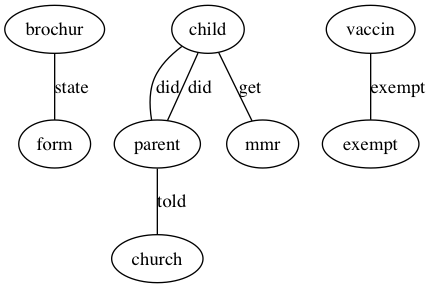

In [196]:
import time # to calculate the annotation time
import re # regular expression
import networkx as nx # to calculate the shortest path between nodes in the parsing tree
from practnlptools.tools import Annotator # to extract dep_parse, syntatic_parse, srl, verbs, words, POS, NER, chunks
import pandas as pd
from datetime import datetime, timedelta
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint # print dictionaries nicer
from nxpd import draw # show in iptyhon
from IPython.display import display # to display images and draw objects 
from networkx.drawing.nx_agraph import write_dot
import sys
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
import numpy as np

try:
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    raise ImportError("This example needs Graphviz and either PyGraphviz or Pydot")

%matplotlib inline

#import the other functions
%run -i 'main_functions'
%run -i 'utility_functions'
%run -i 'parameters'

SEPARATE_SENT = True
SHOW_DP_PLOTS = False
SHOW_REL_EXTRACTIONS = False

annotator = Annotator()

'''
A few sample test cases:
#texts = ["the Church told all Catholic parents not to let their child get the MMR."]
#texts = ["Why Samsung Pay could gain an early lead in mobile payments."]
#texts = ["You would keep your child 's shot records at home and NOT submit that to the school...only your exemption from all shots ."]
#texts = ["Parents may use their philosophical beliefs exemption for ANY vaccine they choose to do so ; you may selectively vaccinate your child and exempt them out of other vaccines ; you may also exempt out of any and all vaccines and use your exemption that way , as well ."]
texts = ["Here is the Hawaii immunization brochure , which states the exemption forms can also be obtained from the school : Immunization and TB code : Surprisingly , I do n't see anything about religiously exempting a child from the TB screening requirement in the code ."]
'''

all_rels_str = []
all_rels = []
start_time = time.time()
texts.insert(0,"parents did child")
texts.insert(0,"parents did child")
for ind, t_orig in enumerate(texts):
    if ind > 5:
        break
    t_sentences = []
    try:
        t_sentences = sent_tokenize(t_orig)
    except:
        print "Error in sentence tokenizer!"
    #print "number of sentences: ", len(t_sentences)
    for t in t_sentences:
        try:
            t_annotated = annotator.getAnnotations(t, dep_parse=True)
        except:
            print "Error in sentence annotation"
        try:
            g_dir = create_dep_graph(t_annotated)
            if g_dir is None:
                print "No extraction found"
                continue
            if SHOW_DP_PLOTS:
                plot_dep(g_dir,t)
            g_undir = g_dir.to_undirected()
        except:
            print "Unexpected error while extracting relations:", sys.exc_info()[0]
        rels_pure, rels_simp = get_relations(g_dir, t_annotated, option="SVO")
        rels = rels_simp
        if SHOW_REL_EXTRACTIONS:
            print ind, t_orig, "\n"
            print_relations(rels)
        else:
            print ind, " "
        all_rels_str = all_rels_str + get_rels_str(rels) #For simply counting the exact strings
        all_rels = all_rels + rels # to later create a dataframe


end_time = time.time()
print "Relation Extraction Time: ", end_time-start_time , "(seconds) - ", (end_time-start_time)/60, "(min)"
print "***************STATISTICS***************"
print "Total number of input records (posts): ", len(texts)
print "Total number of extracted relations: ", len(all_rels_str)
print_top_relations(all_rels_str,top_num=-1) 

df_rels = pd.DataFrame(all_rels)
g_arg = create_argument_graph(df_rels.copy(),source='arg1',target='arg2',edge_attr = 'rel', graph_type = "multi")
nx.write_gexf(g_arg, "../gephi_data/g_arg.gexf")
plot_argument_graph(g_arg)

In [197]:
create_argument_multiGraph(df_rels,'arg1','arg2')

      arg1    arg2              pattern     rel
0   parent   child  (nsubj, verb, dobj)     did
1   parent   child  (nsubj, verb, dobj)     did
2   church  parent  (nsubj, verb, dobj)    told
3    child     mmr  (nsubj, verb, dobj)     get
4   exempt  vaccin  (nsubj, verb, dobj)  exempt
5  brochur    form  (nsubj, verb, dobj)   state


[u'brochur',
 u'form',
 u'parent',
 u'child',
 u'church',
 u'mmr',
 u'vaccin',
 u'exempt']

In [193]:
df_rels

,arg1,arg2,pattern,rel
0,parent,child,"(nsubj, verb, dobj)",did
1,parent,child,"(nsubj, verb, dobj)",did
2,church,parent,"(nsubj, verb, dobj)",told
3,child,mmr,"(nsubj, verb, dobj)",get
4,exempt,vaccin,"(nsubj, verb, dobj)",exempt
5,brochur,form,"(nsubj, verb, dobj)",state
